In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from auren.core import signal_processing_utils as spu


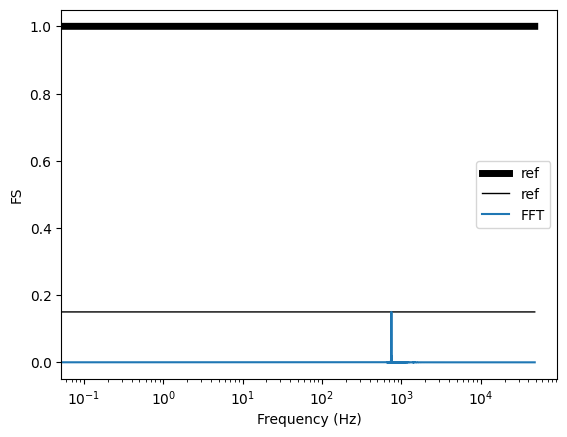

In [27]:
f0 = 96000/128
duration = 10
samplerate = 96000
frac = 0.15

amplitude = lambda freq: 1
times = np.linspace(0, duration, int(samplerate * duration))

chirp = np.sin(np.pi * 2 * times*f0)
chirp[times > frac * times.max()] = 0

ref_f, ref_a = spu.to_fourier(chirp, samplerate)

# Compute the reference fourier transform
ref_f, ref_a = spu.to_fourier(chirp, samplerate)

plt.figure()
plt.semilogx(ref_f, ref_f*0 + amplitude(ref_f), 'k', label="ref", lw=5)
plt.semilogx(ref_f, ref_f*0 + amplitude(ref_f)*frac, 'k', label="ref", lw=1)
# NOTE! The 3.25 is a function of f1 and f0!!! What is the relationship -- I don't know!
plt.semilogx(ref_f, np.abs(ref_a)*np.sqrt(2), label="FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("FS")
plt.legend()
# I = (ref_f >= (f0 + (f1 - f0) * 0.1)) & (ref_f <= (f1 - (f1 - f0) * 0.1))
# plt.title((amplitude(ref_f) / (np.abs(ref_a) * np.sqrt(ref_f)* np.sqrt(duration) * np.log10(f1/f0)))[I].mean())